In [233]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [234]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [235]:
from pylab import rcParams
rcParams['figure.figsize'] = 10.5, 6

In [236]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

### Boston House Prices dataset

In [237]:
boston = load_boston()

In [238]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [239]:
x = pd.DataFrame(boston.data, columns=boston.feature_names)

In [240]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [241]:
y = pd.DataFrame(boston.target, columns=['price'])

In [242]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [243]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

### StandardScaler

In [244]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [245]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [246]:
x_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


### TSNE

In [247]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_scaled)
x_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

In [248]:
x_train_tsne.shape

(404, 2)

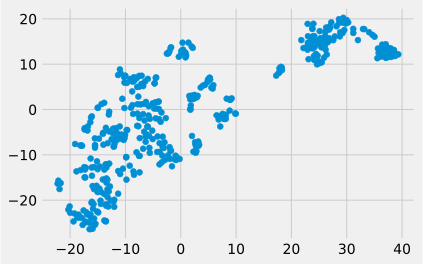

In [249]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

### KMeans

#### train dataset

In [250]:
km = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [251]:
x_train_km_labels = km.fit_predict(x_train_scaled)
x_train_km_labels

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

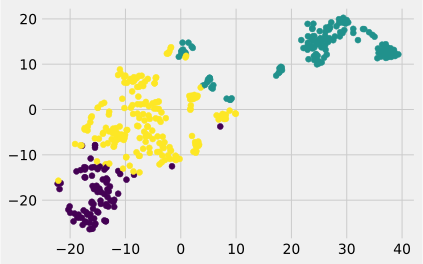

In [252]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=x_train_km_labels)

In [253]:
x_train = pd.concat([x_train, y_train], axis=1)
x_train_km_labels = pd.DataFrame(x_train_km_labels, columns=['label'])
x_train = x_train.reset_index(drop=True)
x_train = pd.concat([x_train, x_train_km_labels], axis=1)
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,label
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0,1
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9,2
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4,0
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4,1
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2,2


In [254]:
x_train[['CRIM', 'price']][x_train['label'] == 0].describe()

,CRIM,price
count,86.000000,86.000000
mean,0.073566,27.788372
std,0.065514,7.067730
min,0.009060,17.100000
25%,0.033805,22.675000
50%,0.051915,24.900000
75%,0.095195,32.575000
max,0.368940,50.000000


In [255]:
x_train[['CRIM', 'price']][x_train['label'] == 1].describe()

,CRIM,price
count,127.000000,127.000000
mean,10.797028,16.165354
std,13.246373,7.814876
min,0.111320,5.000000
25%,3.735965,11.850000
50%,7.672020,14.600000
75%,12.661150,19.300000
max,88.976200,50.000000


In [256]:
x_train[['CRIM', 'price']][x_train['label'] == 2].describe()

,CRIM,price
count,191.000000,191.000000
mean,0.421660,24.958115
std,0.546254,8.746676
min,0.024980,11.900000
25%,0.082865,19.400000
50%,0.198020,22.300000
75%,0.535560,27.800000
max,2.924000,50.000000


#### test dataset

In [257]:
x_test_km_labels = km.predict(x_test_scaled)

In [265]:
x_test = pd.concat([x_test, y_test], axis=1)
x_test_km_labels = pd.DataFrame(x_test_km_labels, columns=['label'])
x_test = x_test.reset_index(drop=True)
x_test = pd.concat([x_test, x_test_km_labels], axis=1)
x_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,label
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6,2
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4,0
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6,1
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8,2
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1,1


In [266]:
x_test[['CRIM', 'price']][x_test['label'] == 0].describe()

,CRIM,price
count,16.000000,16.000000
mean,0.062060,31.350000
std,0.046385,10.148038
min,0.013110,20.600000
25%,0.033173,24.625000
50%,0.036820,28.800000
75%,0.086483,35.400000
max,0.162110,50.000000


In [267]:
x_test[['CRIM', 'price']][x_test['label'] == 1].describe()

,CRIM,price
count,35.000000,35.000000
mean,10.165531,16.437143
std,9.910654,7.986389
min,0.105740,5.000000
25%,4.489075,11.800000
50%,7.022590,15.000000
75%,13.426500,19.250000
max,45.746100,50.000000


In [268]:
x_test[['CRIM', 'price']][x_test['label'] == 2].describe()

,CRIM,price
count,51.000000,51.000000
mean,0.266079,21.860784
std,0.313473,5.119730
min,0.006320,12.700000
25%,0.085470,18.900000
50%,0.139140,21.200000
75%,0.303935,23.700000
max,1.232470,43.500000
